<a href="https://colab.research.google.com/github/kavehkarimadini/ARC_101_Machine_Learning/blob/main/Gaussian_Discriminant_Analysis(GDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Discriminant Analysis (GDA)
Gaussian Discriminant Analysis (GDA) is a generative learning approach for classification. In GDA, we assume that the features $ \mathbf{x} $ given a class label $ y $ are drawn from a multivariate Gaussian (normal) distribution. For each class $ k $, the model assumes

$
p(\mathbf{x} \mid y=k) = \frac{1}{(2\pi)^{d/2} |\boldsymbol{\Sigma}_k|^{1/2}} \exp\!\left(-\frac{1}{2} (\mathbf{x}-\boldsymbol{\mu}_k)^T \boldsymbol{\Sigma}_k^{-1} (\mathbf{x}-\boldsymbol{\mu}_k)\right)
$

where:
- $ \boldsymbol{\mu}_k $ is the mean (or center) of the Gaussian for class $ k $,
- $ \boldsymbol{\Sigma}_k $ is the covariance matrix (often denoted by “sigma” or $\Sigma$), and
- $ d $ is the dimensionality of the feature space.

After modeling the class-conditional densities, Bayes’ rule is used to compute the posterior probability $ p(y=k \mid \mathbf{x}) $ and thus to make predictions. The decision boundaries are derived from the comparisons of these posterior probabilities.

A key aspect of GDA is how the parameters $ \boldsymbol{\mu} $ and $ \boldsymbol{\Sigma} $ affect the shape and position of the Gaussian “bell” curves. In simple terms:

- **Changing $ \boldsymbol{\mu} $ (the mean):**  
  Shifts the center of the Gaussian curve. In a 3D visualization (where the $ x $ and $ y $ axes represent features and the $ z $ axis represents the probability density), moving $ \boldsymbol{\mu} $ will translate the peak of the bell curve to a different location in the $ x $-$ y $ plane.

- **Changing $ \boldsymbol{\Sigma} $ (the covariance matrix):**  
  Affects the spread and orientation of the Gaussian. For example:
  - A larger variance (diagonal entries of $ \boldsymbol{\Sigma} $) will “flatten” the curve, lowering the peak and increasing the spread.
  - Off-diagonal entries (covariances) introduce correlations between features, which can rotate the principal axes of the bell.

Below is an example Python code that generates a few 3D plots to illustrate how changing $ \boldsymbol{\mu} $ and $ \boldsymbol{\Sigma} $ affects the Gaussian surface.

---

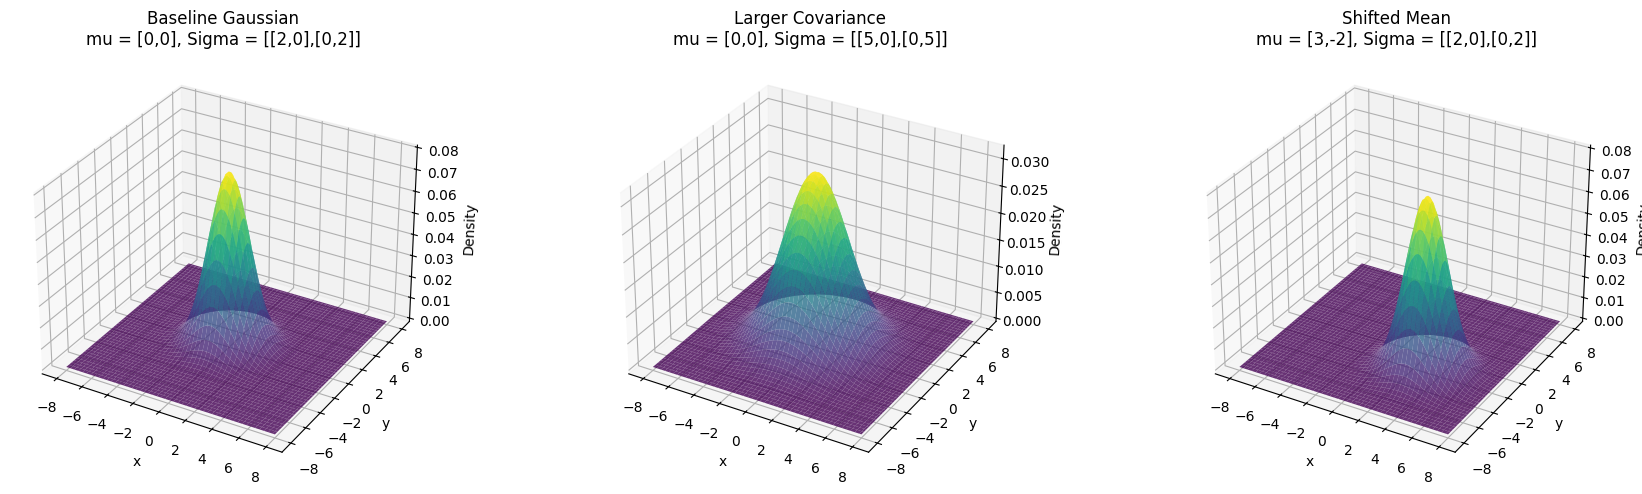

In [1]:
### Python Code Example

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # enables 3D plotting

def multivariate_gaussian(pos, mu, Sigma):
    """
    Return the multivariate Gaussian distribution on array pos.

    Parameters:
      pos: A grid of (x,y) coordinates, shape (M, N, 2).
      mu: Mean vector of length 2.
      Sigma: 2x2 covariance matrix.
    """
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    # Compute the exponent term for every (x,y) pair in pos.
    diff = pos - mu
    # Using einsum for efficient computation over the grid:
    exponent = np.einsum('...k,kl,...l->...', diff, Sigma_inv, diff)
    return np.exp(-0.5 * exponent) / (2 * np.pi * np.sqrt(Sigma_det))

# Create a grid of (x, y) points
x = np.linspace(-8, 8, 100)
y = np.linspace(-8, 8, 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# 1. Baseline parameters: mu and Sigma
mu1 = np.array([0, 0])
Sigma1 = np.array([[2, 0],
                   [0, 2]])
Z1 = multivariate_gaussian(pos, mu1, Sigma1)

# 2. Increased covariance (larger spread)
Sigma2 = np.array([[5, 0],
                   [0, 5]])
Z2 = multivariate_gaussian(pos, mu1, Sigma2)

# 3. Shifted mean
mu3 = np.array([3, -2])
Z3 = multivariate_gaussian(pos, mu3, Sigma1)

# Plotting the three surfaces
fig = plt.figure(figsize=(18, 5))

# Plot 1: Baseline Gaussian
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_surface(X, Y, Z1, cmap='viridis', edgecolor='none', alpha=0.8)
ax1.set_title('Baseline Gaussian\nmu = [0,0], Sigma = [[2,0],[0,2]]')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('Density')

# Plot 2: Increased covariance (wider spread)
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.plot_surface(X, Y, Z2, cmap='viridis', edgecolor='none', alpha=0.8)
ax2.set_title('Larger Covariance\nmu = [0,0], Sigma = [[5,0],[0,5]]')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('Density')

# Plot 3: Shifted mean
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_surface(X, Y, Z3, cmap='viridis', edgecolor='none', alpha=0.8)
ax3.set_title('Shifted Mean\nmu = [3,-2], Sigma = [[2,0],[0,2]]')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('Density')

plt.tight_layout()
plt.show()

### Explanation of the Plots

1. **Baseline Gaussian:**  
   - **Mean:** $\mu = [0, 0]$  
   - **Covariance:** $\Sigma = \begin{bmatrix}2 & 0 \\ 0 & 2\end{bmatrix}$  
   The plot shows a symmetric bell curve centered at the origin. The spread (or “width”) of the bell is determined by the variances (2 in each direction).

2. **Larger Covariance:**  
   - **Mean:** $\mu = [0, 0]$ (same as before)  
   - **Covariance:** $\Sigma = \begin{bmatrix}5 & 0 \\ 0 & 5\end{bmatrix}$  
   Here, the variances are increased, which flattens the curve (the peak is lower) and increases the spread. This illustrates how a larger covariance makes the density “wider.”

3. **Shifted Mean:**  
   - **Mean:** $\mu = [3, -2]$  
   - **Covariance:** $\Sigma = \begin{bmatrix}2 & 0 \\ 0 & 2\end{bmatrix}$ (back to baseline covariance)  
   This plot shows the bell curve shifted so that its peak is no longer at the origin but at $(3, -2)$. The shape of the bell remains the same as in the baseline case, but its position changes.

---

These visualizations help illustrate the key concepts of GDA. By adjusting $ \mu $, you control where the center of the distribution lies, and by adjusting $ \Sigma $, you control the spread and orientation of the distribution. In a classification problem using GDA, each class would have its own $ \mu $ and $ \Sigma $, and the classifier would use these parameters to decide which class a new point most likely belongs to.

Feel free to modify the code (e.g., by experimenting with off-diagonal covariance terms) to see how correlations between features affect the orientation of the Gaussian bell.

Gaussian Discriminant Analysis (GDA) is a generative classification model that makes explicit assumptions about the joint distribution of the features $ \mathbf{x} $ and the label $ y $. In the binary classification case (with $ y \in \{0,1\} $), GDA models the joint probability as

$
p(\mathbf{x}, y) = p(\mathbf{x} \mid y)\,p(y),
$

where the class-conditional densities $ p(\mathbf{x} \mid y=k) $ (for $ k=0,1 $) are assumed to be multivariate Gaussian, and $ p(y) $ is modeled with a Bernoulli distribution. Let’s break this down:

---

## The GDA Model Specification

1. **Class-conditional Densities:**

   For each class $ k \in \{0,1\} $, we assume

   $
   p(\mathbf{x} \mid y=k) = \frac{1}{(2\pi)^{d/2} |\boldsymbol{\Sigma}_k|^{1/2}} \exp\!\left(-\frac{1}{2} (\mathbf{x}-\boldsymbol{\mu}_k)^T \boldsymbol{\Sigma}_k^{-1} (\mathbf{x}-\boldsymbol{\mu}_k)\right).
   $

   In many practical implementations, a simplifying assumption is made that **both classes share the same covariance matrix**, i.e.,

   $
   \boldsymbol{\Sigma}_0 = \boldsymbol{\Sigma}_1 = \boldsymbol{\Sigma}.
   $

   This assumption leads to linear decision boundaries. Without it, the boundaries become quadratic (a model known as Quadratic Discriminant Analysis, QDA).

2. **Prior on the Labels:**

   The class prior is modeled as

   $
   p(y = 1) = \phi \quad \text{and} \quad p(y = 0) = 1 - \phi.
   $

3. **The Joint Distribution:**

   The full joint likelihood for a data point $(\mathbf{x}^{(i)}, y^{(i)})$ is then

   $
   p(\mathbf{x}^{(i)}, y^{(i)}) = p(\mathbf{x}^{(i)} \mid y^{(i)}) \, p(y^{(i)}).
   $

   For a dataset of $ n $ independent observations, the joint likelihood is

   $
   \mathcal{L}(\phi, \boldsymbol{\mu}_0, \boldsymbol{\mu}_1, \boldsymbol{\Sigma}) = \prod_{i=1}^n \left[ p(\mathbf{x}^{(i)} \mid y^{(i)}) \, p(y^{(i)}) \right].
   $

---

## Fitting the Model: Maximizing the Joint Likelihood

The parameters $\phi$, $\boldsymbol{\mu}_0$, $\boldsymbol{\mu}_1$, and $\boldsymbol{\Sigma}$ are estimated by **maximizing the joint likelihood** (or equivalently, the log-likelihood) over the training data. This is a typical **maximum likelihood estimation (MLE)** problem:

1. **For the class prior $\phi$:**

   $
   \hat{\phi} = \frac{1}{n} \sum_{i=1}^n 1\{y^{(i)} = 1\},
   $
   which is simply the fraction of positive examples in the dataset.

2. **For the class means $\boldsymbol{\mu}_0$ and $\boldsymbol{\mu}_1$:**

   $
   \hat{\boldsymbol{\mu}}_0 = \frac{\sum_{i: y^{(i)} = 0} \mathbf{x}^{(i)}}{\sum_{i: y^{(i)} = 0} 1}, \quad
   \hat{\boldsymbol{\mu}}_1 = \frac{\sum_{i: y^{(i)} = 1} \mathbf{x}^{(i)}}{\sum_{i: y^{(i)} = 1} 1}.
   $

3. **For the covariance matrix $\boldsymbol{\Sigma}$:**

   Under the common covariance assumption, the MLE for $\boldsymbol{\Sigma}$ is given by

   $
   \hat{\boldsymbol{\Sigma}} = \frac{1}{n} \sum_{i=1}^n \left( \mathbf{x}^{(i)} - \hat{\boldsymbol{\mu}}_{y^{(i)}} \right)\left( \mathbf{x}^{(i)} - \hat{\boldsymbol{\mu}}_{y^{(i)}} \right)^T.
   $

   This covariance matrix essentially captures the spread and the correlation of the features across all classes. The **contours** of constant density for a Gaussian distribution are ellipsoids determined by $\boldsymbol{\Sigma}$. In two dimensions, for instance, the eigenvectors of $\boldsymbol{\Sigma}$ determine the orientation of the ellipse, and the eigenvalues determine its axes’ lengths.

---

## Joint Likelihood vs. Conditional Likelihood

- **Joint Likelihood:**  
  In GDA, we maximize the joint likelihood $ p(\mathbf{x}, y) $ with respect to all the parameters. This means that we model how the features $\mathbf{x}$ and the labels $ y $ are generated together. The joint likelihood is given by

  $
  \mathcal{L} = \prod_{i=1}^n p(\mathbf{x}^{(i)} \mid y^{(i)})\, p(y^{(i)}).
  $

- **Conditional Likelihood:**  
  In contrast, discriminative models like logistic regression focus on the conditional likelihood $ p(y \mid \mathbf{x}) $. In this approach, you directly maximize the likelihood of the observed labels given the features, bypassing any modeling of $ p(\mathbf{x}) $. This typically leads to a different estimation procedure and can sometimes be more flexible when the distribution of $\mathbf{x}$ is complex.

The key difference is that **GDA (a generative model)** attempts to model the entire data generating process (both $\mathbf{x}$ and $ y $), while **discriminative models** focus solely on the boundary between classes by modeling $ p(y \mid \mathbf{x}) $.

---

## How the Covariance Matrix Fits a Contour on the Data

The covariance matrix $\boldsymbol{\Sigma}$ in the Gaussian density determines the shape, spread, and orientation of the distribution’s contours:

- **Elliptical Contours:**  
  In a 2D feature space, the equation of the Gaussian density’s contour at a fixed probability level is an ellipse given by

  $
  (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) = \text{constant}.
  $

  Here, $\boldsymbol{\Sigma}$ controls how “stretched” the ellipse is in various directions.

- **Orientation and Scale:**  
  The eigenvalues of $\boldsymbol{\Sigma}$ determine the lengths of the principal axes of the ellipse (the larger the eigenvalue, the longer the corresponding axis), and the eigenvectors determine the directions of these axes.

Thus, by fitting $\boldsymbol{\Sigma}$ to the data, GDA is essentially fitting these elliptical contours around the data for each class (or globally when assuming common covariance), capturing the spread and the underlying correlations in the data.

---

## Prediction: The Argmax Rule

Once the parameters are estimated, the prediction for a new data point $\mathbf{x}$ is made by computing the posterior probabilities for each class using Bayes’ rule:

$
p(y=k \mid \mathbf{x}) = \frac{p(\mathbf{x} \mid y=k)\, p(y=k)}{p(\mathbf{x})},
$

where

$
p(\mathbf{x}) = \sum_{k=0}^{1} p(\mathbf{x} \mid y=k)\, p(y=k).
$

The predicted class $\hat{y}$ is then determined using the **argmax rule**:

$
\hat{y} = \underset{k \in \{0,1\}}{\operatorname{argmax}}\, p(y=k \mid \mathbf{x}).
$

Because the denominator $ p(\mathbf{x}) $ is the same for all classes, this rule is equivalent to choosing the class that maximizes the numerator $ p(\mathbf{x} \mid y=k)\, p(y=k) $.

In summary, GDA:
- **Models the joint distribution** $ p(\mathbf{x}, y) $ by assuming Gaussian class-conditional densities and a Bernoulli prior for $ y $.
- **Fits parameters by maximizing the joint likelihood**, which involves estimating $\phi$, the class means, and the covariance matrix.
- **Uses the covariance matrix** to capture the spread and correlation in the data, thereby determining the shape (contours) of the Gaussian distributions.
- **Predicts new examples** by applying Bayes’ rule and selecting the class with the highest posterior probability (the argmax decision rule).

This contrasts with models that maximize the **conditional likelihood** $ p(y \mid \mathbf{x}) $ directly, which do not explicitly model the distribution of the features $ \mathbf{x} $.

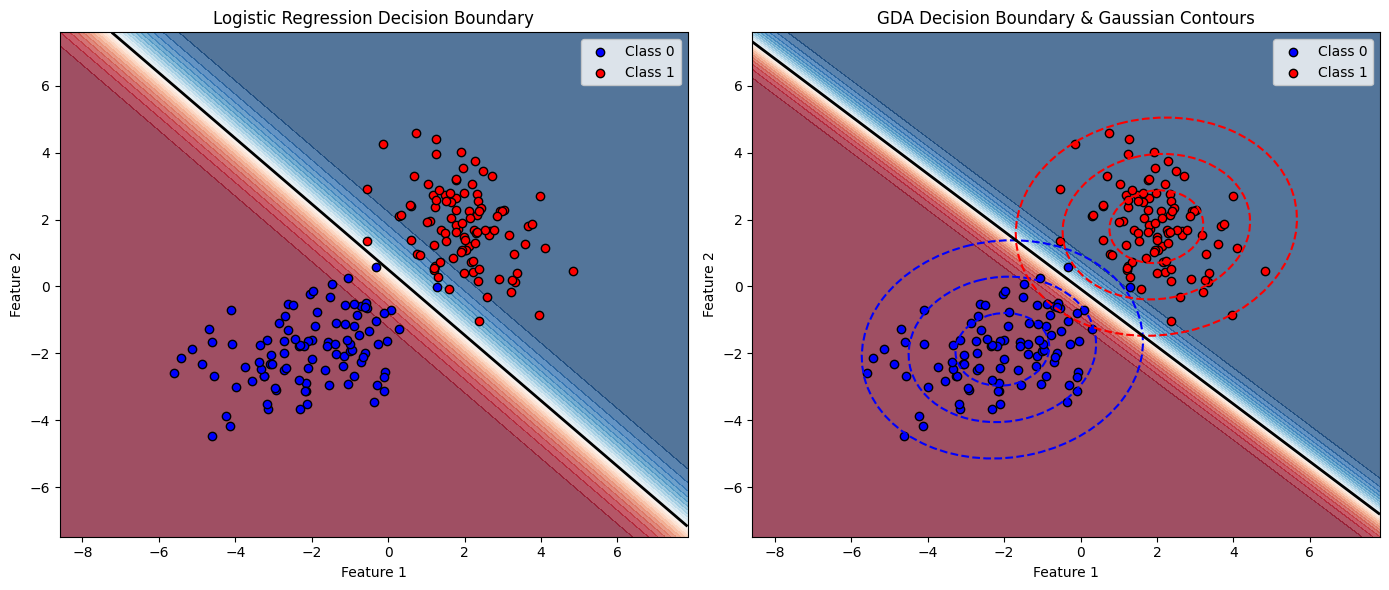

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.linear_model import LogisticRegression

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic data
# Class 0: Negative examples, centered at (-2,-2)
mean0 = np.array([-2, -2])
cov0 = np.array([[2, 0.5],
                 [0.5, 1]])
n0 = 100
X0 = np.random.multivariate_normal(mean0, cov0, n0)
y0 = np.zeros(n0)

# Class 1: Positive examples, centered at (2,2)
mean1 = np.array([2, 2])
cov1 = np.array([[1, -0.3],
                 [-0.3, 1.5]])
n1 = 100
X1 = np.random.multivariate_normal(mean1, cov1, n1)
y1 = np.ones(n1)

# Combine data
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# Create a meshgrid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 3, X[:, 0].max() + 3
y_min, y_max = X[:, 1].min() - 3, X[:, 1].max() + 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

####################################
# Logistic Regression (Discriminative)
####################################
logreg = LogisticRegression()
logreg.fit(X, y)
# Predict probability on the grid
probs_lr = logreg.predict_proba(grid)[:, 1].reshape(xx.shape)

####################################
# Gaussian Discriminant Analysis (Generative)
####################################
# Estimate class priors
phi = np.mean(y)  # p(y=1)
# Estimate class means
mu0 = np.mean(X0, axis=0)
mu1 = np.mean(X1, axis=0)
# Estimate shared covariance
Sigma = (np.cov(X0.T, bias=True) * (n0) + np.cov(X1.T, bias=True) * (n1)) / (n0 + n1)
Sigma_inv = np.linalg.inv(Sigma)
Sigma_det = np.linalg.det(Sigma)

def gaussian_density(x, mu, Sigma_inv, Sigma_det):
    diff = (x - mu)
    exponent = -0.5 * np.sum(diff @ Sigma_inv * diff, axis=1)
    return np.exp(exponent) / (2 * np.pi * np.sqrt(Sigma_det))

# Compute class-conditional densities on the grid
p_x_given_y0 = gaussian_density(grid, mu0, Sigma_inv, Sigma_det)
p_x_given_y1 = gaussian_density(grid, mu1, Sigma_inv, Sigma_det)
# Compute joint probabilities (note: p(y=0)=1-phi, p(y=1)=phi)
joint0 = p_x_given_y0 * (1 - phi)
joint1 = p_x_given_y1 * phi
# Compute posterior probability p(y=1|x) for GDA using Bayes rule
probs_gda = joint1 / (joint0 + joint1)
probs_gda = probs_gda.reshape(xx.shape)

# The decision boundary is where p(y=1|x) = 0.5 (or where joint0 = joint1).

####################################
# Visualization
####################################
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Logistic Regression
ax = axes[0]
cs = ax.contourf(xx, yy, probs_lr, levels=np.linspace(0, 1, 25), cmap='RdBu', alpha=0.7)
ax.contour(xx, yy, probs_lr, levels=[0.5], colors='black', linewidths=2)
ax.scatter(X0[:, 0], X0[:, 1], c='blue', edgecolor='k', label='Class 0')
ax.scatter(X1[:, 0], X1[:, 1], c='red', edgecolor='k', label='Class 1')
ax.set_title('Logistic Regression Decision Boundary')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()

# Plot for GDA
ax = axes[1]
cs = ax.contourf(xx, yy, probs_gda, levels=np.linspace(0, 1, 25), cmap='RdBu', alpha=0.7)
ax.contour(xx, yy, probs_gda, levels=[0.5], colors='black', linewidths=2)
ax.scatter(X0[:, 0], X0[:, 1], c='blue', edgecolor='k', label='Class 0')
ax.scatter(X1[:, 0], X1[:, 1], c='red', edgecolor='k', label='Class 1')
ax.set_title('GDA Decision Boundary & Gaussian Contours')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()

# Add GDA contour ellipses (one for each class)
def plot_ellipse(ax, mu, Sigma, color):
    # Compute eigenvalues and eigenvectors
    vals, vecs = np.linalg.eigh(Sigma)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    angle = np.degrees(np.arctan2(vecs[1, 0], vecs[0, 0]))
    # Draw ellipse for 1, 2, and 3 standard deviations
    for nsig in range(1, 4):
        width, height = 2 * nsig * np.sqrt(vals)
        ellip = Ellipse(xy=mu, width=width, height=height, angle=angle,
                        edgecolor=color, fc='None', lw=1.5, ls='--')
        ax.add_patch(ellip)

plot_ellipse(axes[1], mu0, Sigma, 'blue')
plot_ellipse(axes[1], mu1, Sigma, 'red')

plt.tight_layout()
plt.show()


### Explanation

1. **Data Generation:**  
   We create two clusters:
   - **Class 0:** Centered around $(-2, -2)$ with its own covariance.
   - **Class 1:** Centered around $(2, 2)$ with a different covariance.
   
2. **Logistic Regression:**  
   We fit a logistic regression model (using `sklearn.linear_model.LogisticRegression`) and compute the class probability $ p(y=1 \mid \mathbf{x}) $ over a grid. The decision boundary is where this probability equals 0.5 (drawn as a black contour).

3. **Gaussian Discriminant Analysis (GDA):**  
   We estimate the class priors, means, and a **shared covariance** matrix (a common assumption in GDA) from the data. Then, we compute the Gaussian density for each class over the grid, use Bayes’ rule to get $ p(y=1 \mid \mathbf{x}) $, and similarly draw the decision boundary (where the probability is 0.5).  
   In addition, we overlay ellipses representing the Gaussian contours for each class. These ellipses show the regions of constant density for the estimated Gaussian distributions.

4. **Visualization:**  
   Two subplots display:
   - **Left Plot (Logistic Regression):** The decision boundary obtained directly by the discriminative model.
   - **Right Plot (GDA):** The decision boundary as computed by the generative model along with contour ellipses that indicate the shape and spread (covariance) of each class.

This visualization demonstrates how the two approaches differ:
- **Logistic Regression** finds a decision boundary by directly modeling $ p(y \mid \mathbf{x}) $ and does not model the feature distribution.
- **GDA** models the underlying distribution of the features for each class (the ellipses) and then uses Bayes’ rule to arrive at a decision boundary.